## Exercise (Normal Distribution and Z Score for Outlier Removal)

You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

1.Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

2.After removing outliers in step 1, you get a new dataframe.

3.On step(2) dataframe, use 4 standard deviation to remove outliers

4.Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

5.On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [9]:
import pandas as pd
import seaborn as sn
from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv("bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [6]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

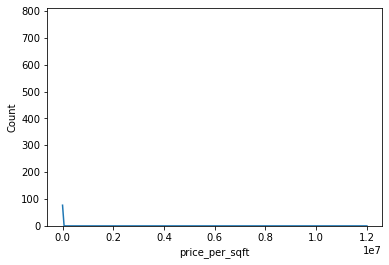

In [8]:
sn.histplot(df.price_per_sqft,kde=True)

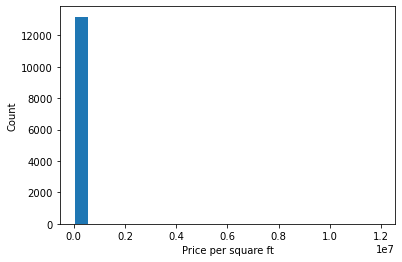

In [55]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

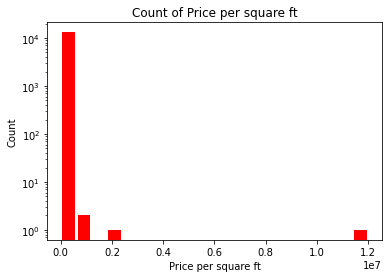

In [32]:
plt.hist(df.price_per_sqft, bins=20,log=True,color="Red", rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
# plt.yscale('log')
plt.title("Count of Price per square ft")
plt.show()

# Using log scale can make visualization little better

## (1) Treat outliers using percentile first

In [34]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [38]:
outliers=df[(df.price_per_sqft<lower_limit)|(df.price_per_sqft>upper_limit)]

In [39]:
outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000


## 2.After removing outliers in step 1, you get a new dataframe.

In [41]:
new_df = df[(df.price_per_sqft<upper_limit) & (df.price_per_sqft>lower_limit)]
new_df.shape

(13172, 7)

In [42]:
df.shape

(13200, 7)

In [43]:
outliers.shape

(28, 7)

**We removed total 28 outliers**

## 3.On step(2) dataframe, use 4 standard deviation to remove outliers

In [45]:
min_limit=new_df.price_per_sqft.mean()-4*new_df.price_per_sqft.std()
min_limit

-9900.429065502549

In [46]:
max_limit=new_df.price_per_sqft.mean()+4*new_df.price_per_sqft.std()
max_limit

23227.73653589429

In [47]:
outliers=new_df[(new_df.price_per_sqft<min_limit)|(new_df.price_per_sqft>max_limit)]

In [52]:
outliers.shape


(125, 7)

In [49]:
new_df2=new_df[(new_df.price_per_sqft>min_limit)&(new_df.price_per_sqft<max_limit)]

In [50]:
new_df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [51]:
new_df2.shape


(13047, 7)

## 4.Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

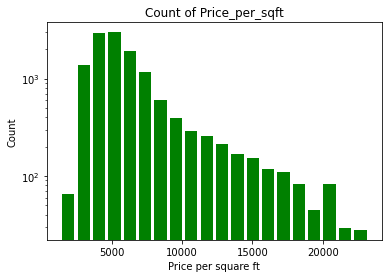

In [65]:
plt.hist(new_df2.price_per_sqft,log=True,bins=20,rwidth=0.8,color="Green")
plt.title("Count of Price_per_sqft")
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

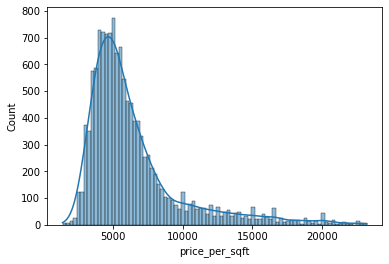

In [62]:
sn.histplot(new_df2.price_per_sqft,kde=True,log_scale=)

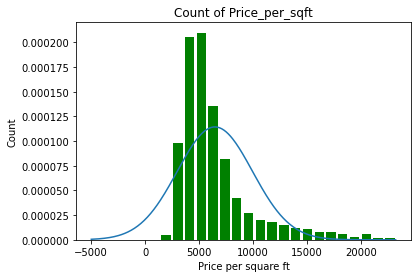

In [73]:
from scipy.stats import norm
import numpy as np
plt.hist(new_df2.price_per_sqft,bins=20,rwidth=0.8,color="Green",density=True)
plt.title("Count of Price_per_sqft")
plt.xlabel('Price per square ft')
plt.ylabel('Count')


rng = np.arange(-5000, new_df2.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,new_df2.price_per_sqft.mean(),new_df2.price_per_sqft.std()))
plt.show()

## (3) Now remove outliers using z score. Use z score of 4 as your thresold

In [75]:
new_df['zscore']=(new_df.price_per_sqft-new_df.price_per_sqft.mean())/new_df.price_per_sqft.std()

C:\Users\HP\AppData\Local\Temp/ipykernel_15036/2593410804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['zscore']=(new_df.price_per_sqft-new_df.price_per_sqft.mean())/new_df.price_per_sqft.std()


In [76]:
new_df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [78]:
outliers_z = new_df[(new_df.zscore < -4) | (new_df.zscore>4)]
outliers_z.shape

(125, 8)

In [79]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
4638,Munnekollal,43 Bedroom,2400.0,40.0,660.0,43,27500,5.031693
13013,other,4 Bedroom,1200.0,5.0,350.0,4,29166,5.434010
3144,other,5 BHK,8321.0,5.0,2700.0,5,32448,6.226568
12948,other,10 Bedroom,7150.0,13.0,3600.0,10,50349,10.549415
1795,2nd Stage Nagarbhavi,5 Bedroom,1200.0,4.0,285.0,5,23750,4.126120


In [81]:
df4 = new_df[(new_df.zscore > -4) & (new_df.zscore<4)]
df4.shape

(13047, 8)